## Importing necessary libraries

In [1]:
#Import libraries for data manipulation
import pandas as pd
import numpy as np

#Import Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#Import libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Import over and undersampling methods
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Import metrics
from sklearn import metrics

#Import imputer
from sklearn.impute import SimpleImputer

#Import one hot encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#Import hyperparameter searches
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Import pipelines
from sklearn.pipeline import Pipeline

#Import Column transformer
from sklearn.compose import ColumnTransformer

#Import warnings
import warnings

#Ignore Warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [133]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
#Import the training and test data:
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tuning/Renewind/Train.csv')
test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tuning/Renewind/Test.csv')

## Data Overview

#### Visualize the Datasets

In [135]:
#look at the first 5 rows of the train set
train_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [136]:
#look at the first 5 rows of the test set
test_set.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [137]:
#Check the shape of the two datasets
train_set.shape
test_set.shape
print(f'The train set has {train_set.shape[0]} rows and {train_set.shape[1]} columns')
print(f'The test set has {test_set.shape[0]} rows and {test_set.shape[1]} columns')

The train set has 20000 rows and 41 columns
The test set has 5000 rows and 41 columns


In [138]:
#Check the values and datatypes
train_set.info()
test_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

Both the test and train datasets contain 40 float types and 1 integer type (the int64 is the target variable)

In [139]:
#Look at the statistics of the train set
train_set.describe().T


,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [140]:
#Check the statistics of the test set
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


#### Missing and duplicate values

In [141]:
#Check for missing values in the train set
null_set_train = train_set.isnull().sum()
null_set_test = test_set.isnull().sum()
print(f'The train set has {null_set_train.sum()} missing values')
print(f'The test set has {null_set_test.sum()} missing values')


The train set has 36 missing values
The test set has 11 missing values


**There a missing values that will need treatment**

In [142]:
#Check for duplicates in both the train and test set
train_set.duplicated().sum()
test_set.duplicated().sum()
print(f'The train set has {train_set.duplicated().sum()} duplicated rows')
print(f'The test set has {test_set.duplicated().sum()} duplicated rows')

The train set has 0 duplicated rows
The test set has 0 duplicated rows


**There are no duplicate rows in either dataset.**

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Plotting histograms and boxplots for all Independent Variables

##### Independent Variable Boxplots

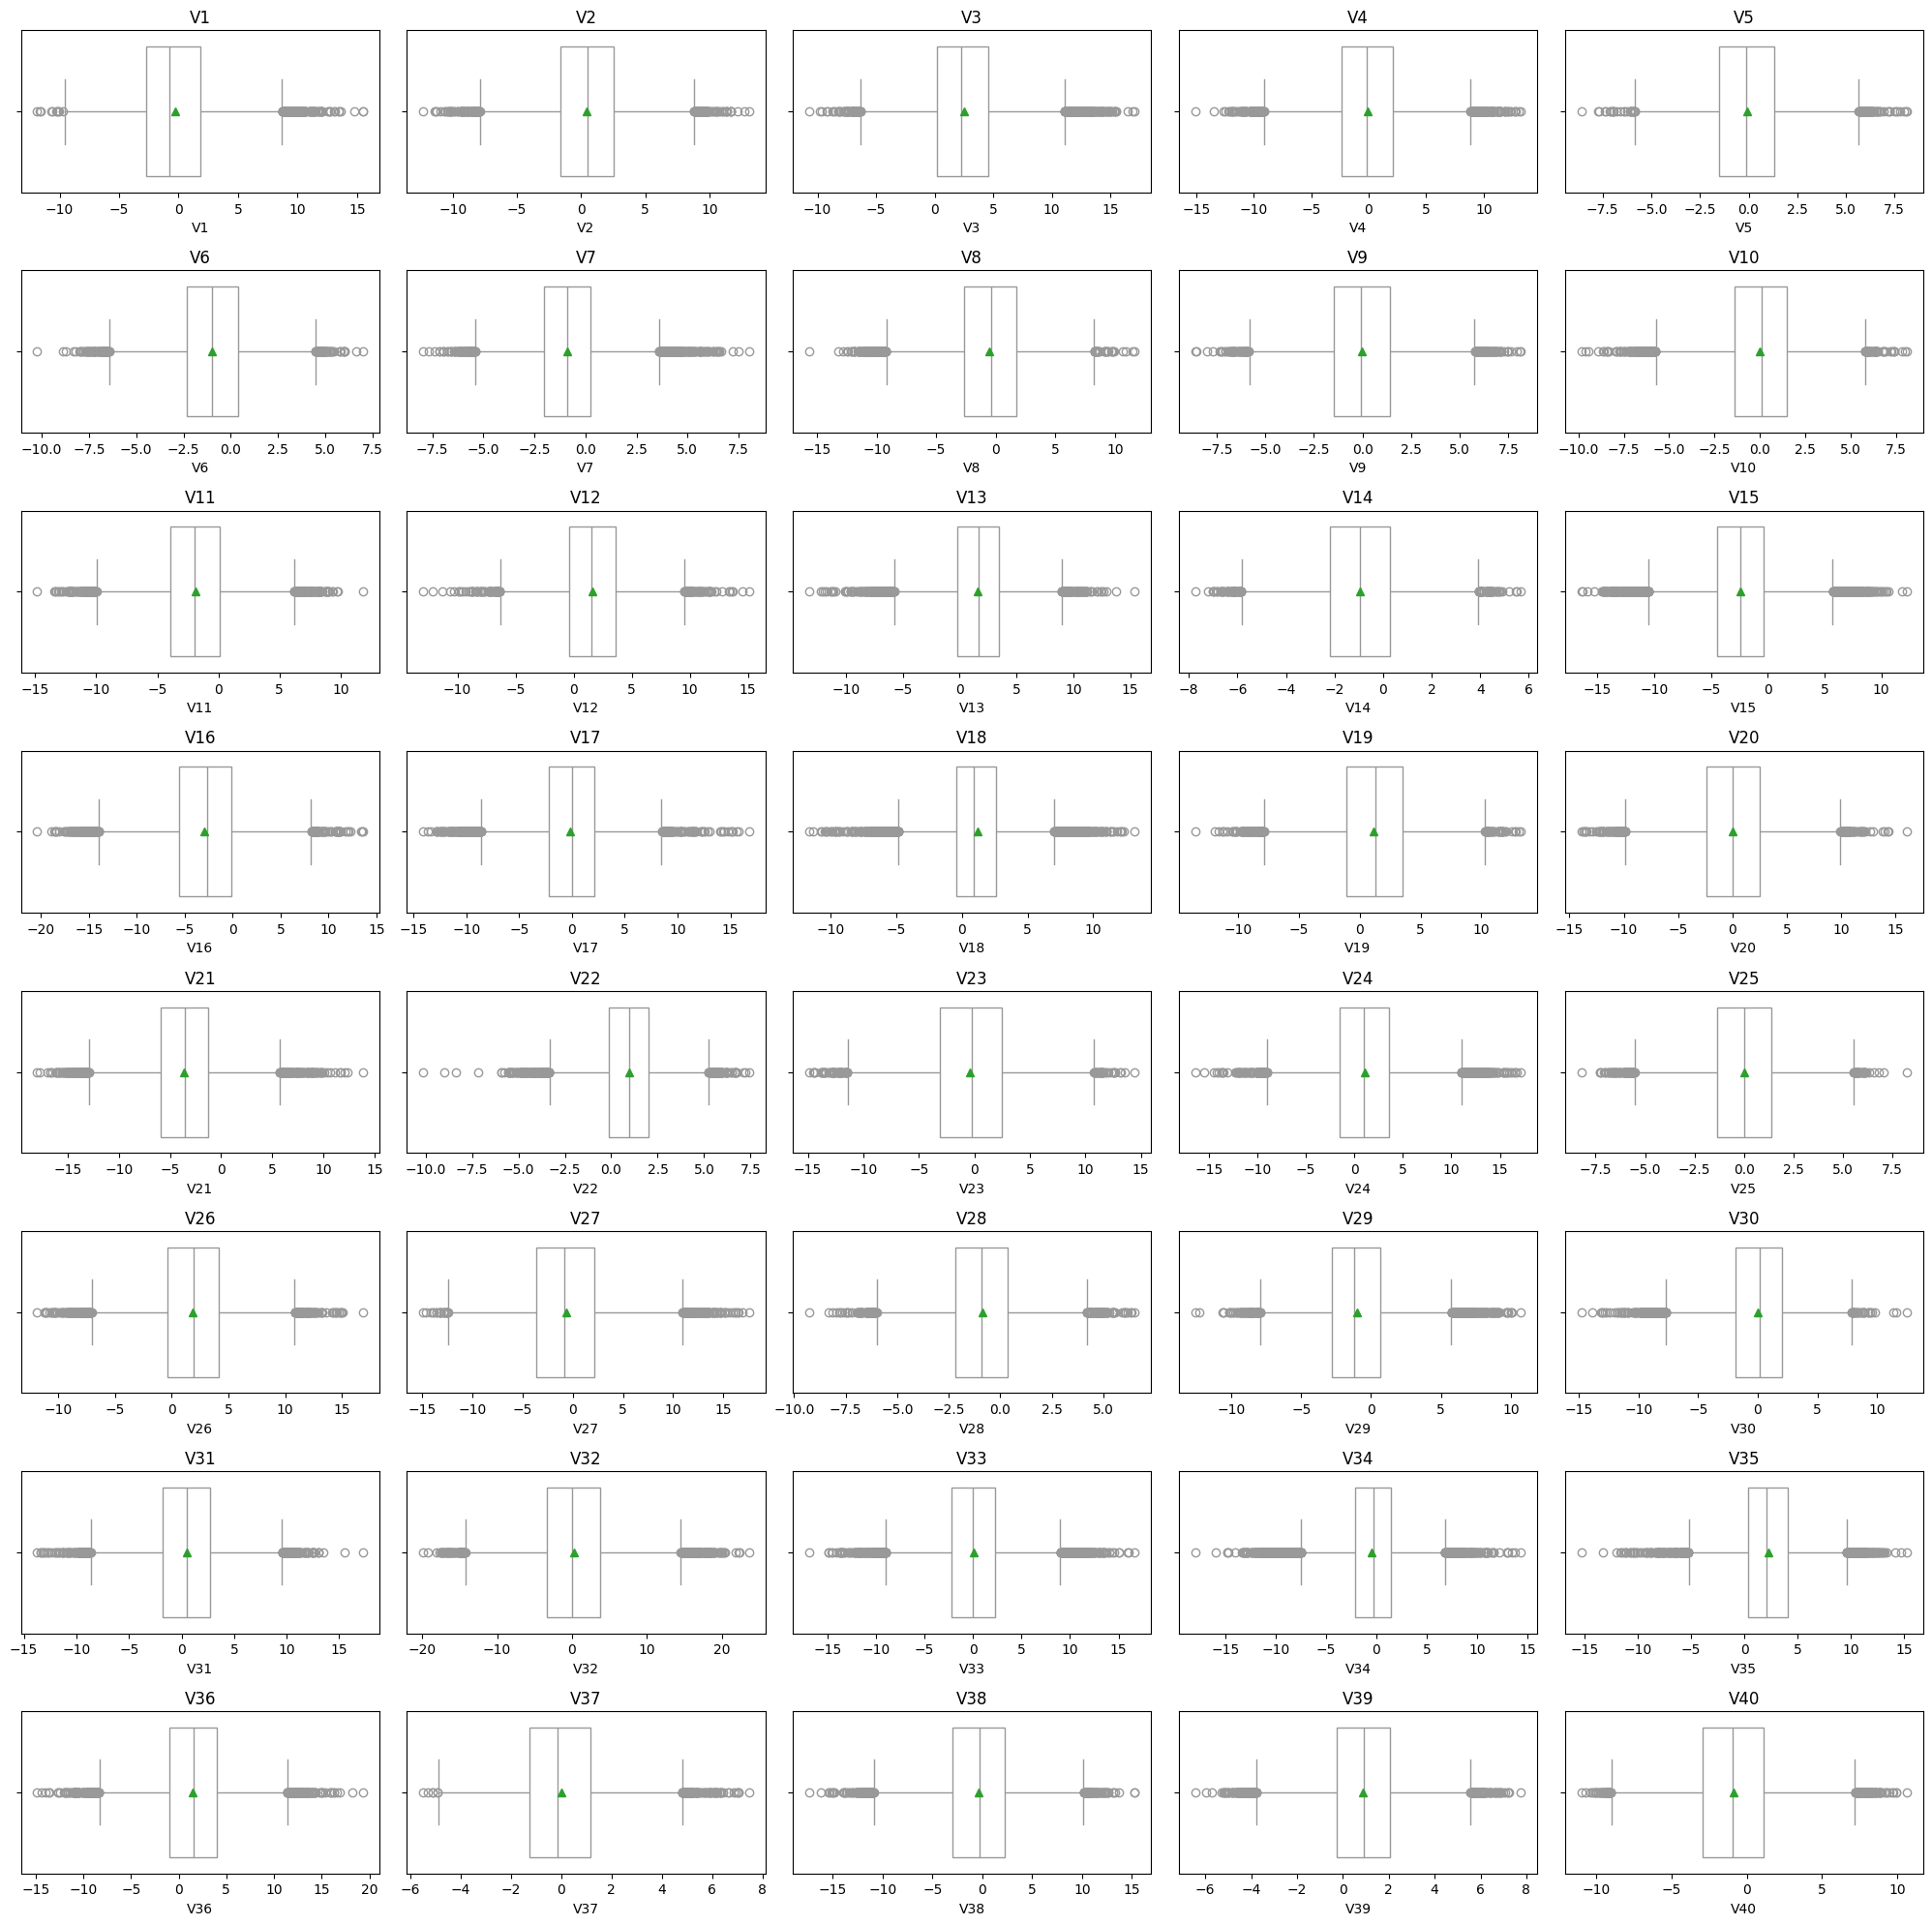

In [143]:
#Create a figure with 8 rows and 5 columns of box and whisker subplots without the target variable
fig, axes = plt.subplots(8, 5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a boxplot for each feature in the train set
for i, feature in enumerate(train_set.columns[:-1]):  # Exclude the target variable
    sns.boxplot(data=train_set, x=feature, ax=axes[i], color="white", showmeans=True)
    axes[i].set_title(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


##### Independent Variable Histograms

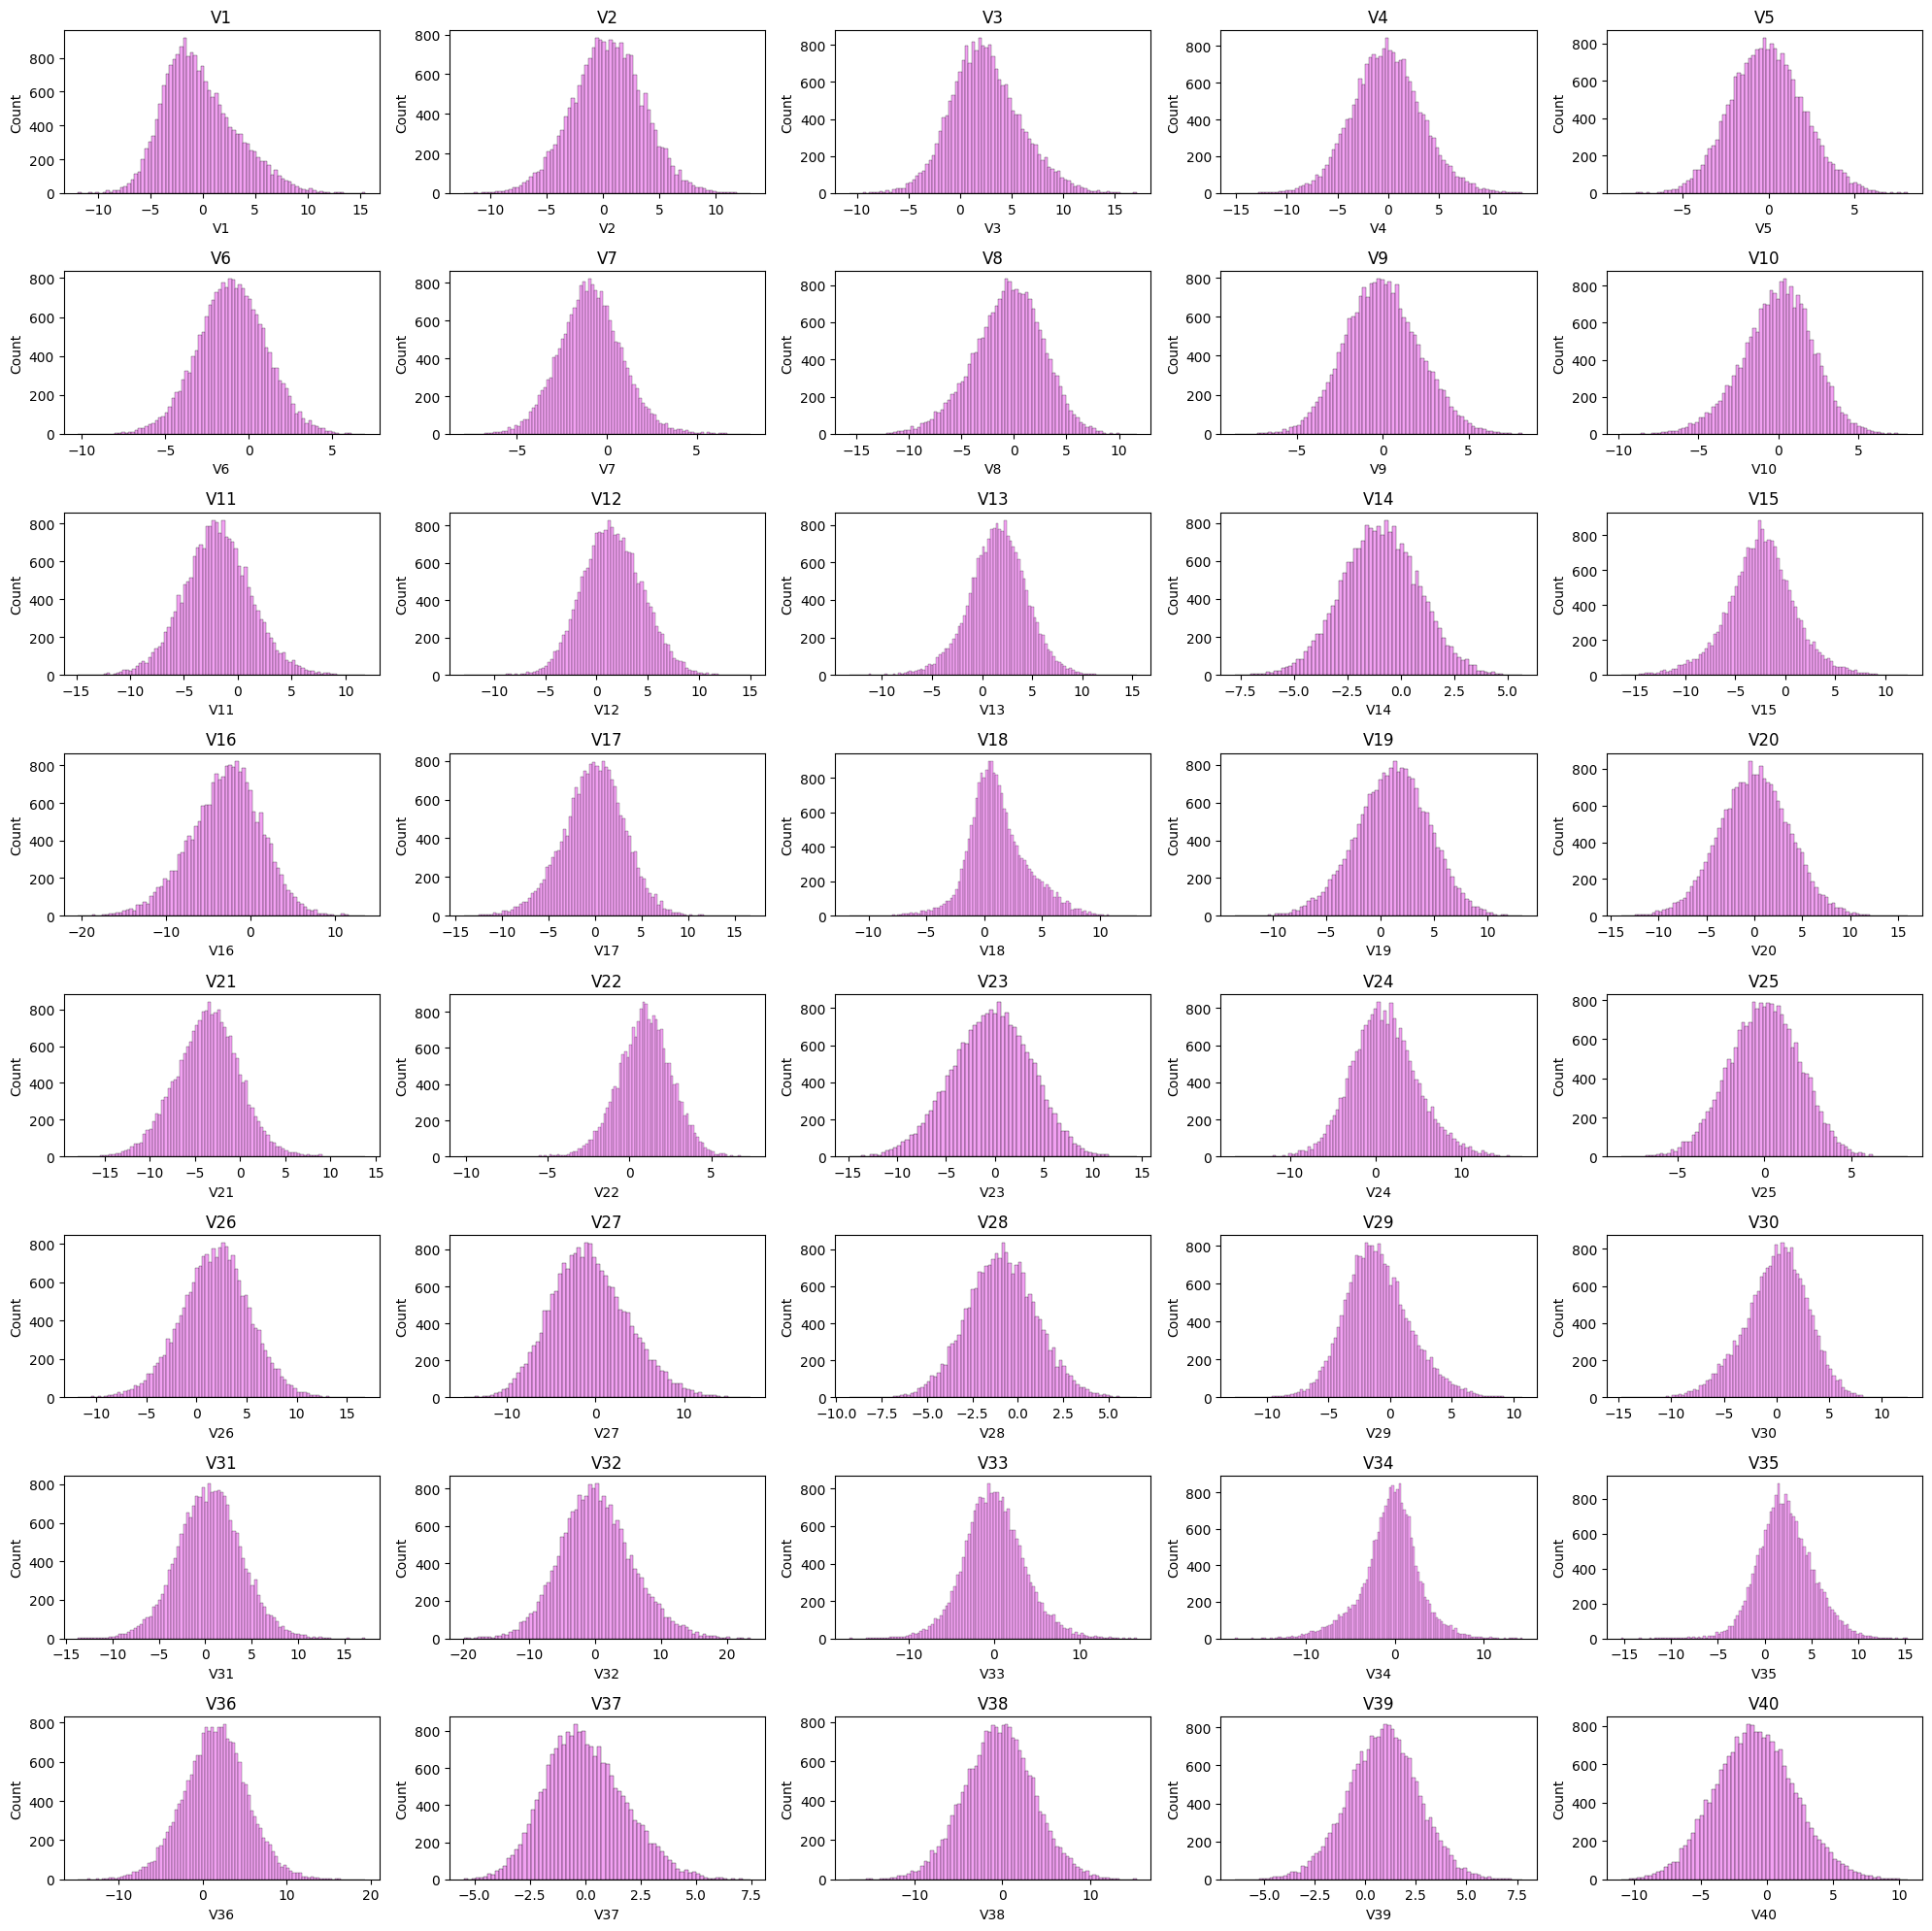

In [144]:
#Create a figure with 8 rows and 5 columns of histogram subplots without the target variable
fig, axes = plt.subplots(8, 5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histplot for each feature in the train set
for i, feature in enumerate(train_set.columns[:-1]):  # Exclude the target variable
    sns.histplot(data=train_set, x=feature, ax=axes[i], color="violet")
    axes[i].set_title(feature)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**All independent variables have a relatively normal distribution with small variations in skewedness and standard deviation.**

##### Evaluate the balance of the target variable

Text(0.5, 1.0, 'Count of Target Variable')

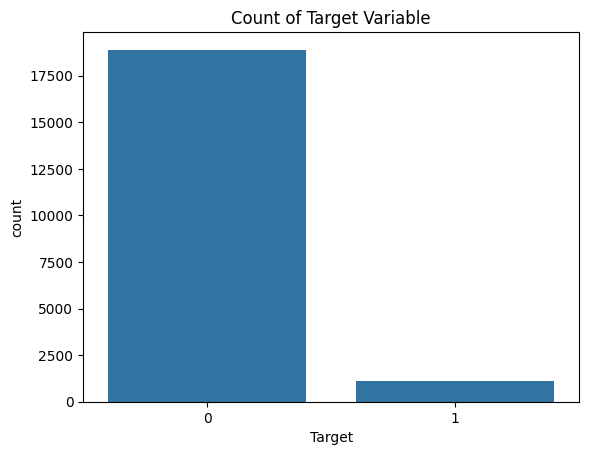

In [145]:
#Create a countplot for the target variable
sns.countplot(data=train_set, x='Target')
plt.title('Count of Target Variable')


In [146]:
#Check the proportion of the target variable
train_set['Target'].value_counts(normalize=True)

,proportion
Target,
0,0.9445
1,0.0555


**94 percent of the target variable is 0 (No failure) while 6 percent is 1 (failure). This is a highly imbalanced dataset.**

### Bivariate Analysis

No major bivariate analysis is needed given the variables but create a heatmap for reference.

<Axes: >

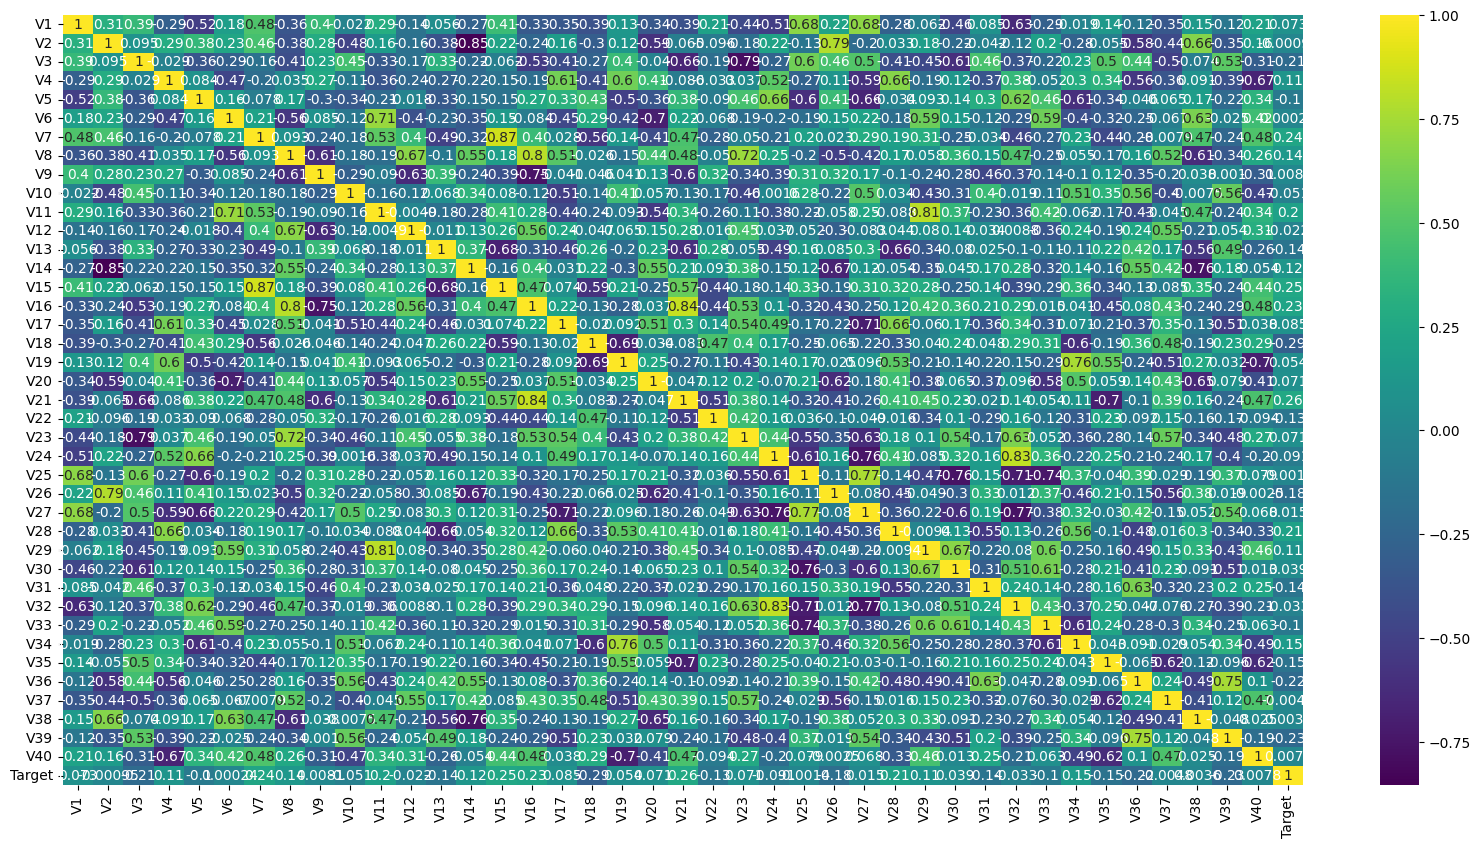

In [147]:
#Create a heatmap to check for correlation
plt.figure(figsize=(20, 10))
sns.heatmap(train_set.corr(), annot=True, cmap='viridis')

## Data Pre-processing

### Separate the target variable from and the independent variables in the training data

In [148]:
#Create two datasets for the features and the target variable
X = train_set.drop('Target', axis=1)
y = train_set['Target']

In [149]:
#Check the shape of each dataset
X.shape, y.shape

((20000, 40), (20000,))

**There are 20000 instances in the Train dataset**

### Split the Training dataset into train and validation sets

In [150]:
#Split the dataset into training and validation sets using a 70-30 split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 1) #Stratify the target variable to ensure equal distribution of the classes

In [151]:
#Look at the shape of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((14000, 40), (6000, 40), (14000,), (6000,))

In [152]:
#Split the test set into features and target variable
X_test = test_set.drop('Target', axis=1)
y_test = test_set['Target']

In [153]:
#Look at the shape of the test set
X_test.shape, y_test.shape

((5000, 40), (5000,))

**There are 14000 instances in the training set and 6000 in the validation set after the 70:30 split**

## Missing value imputation




In [154]:
#Use imputer to fill missing values in datasets
imputer = SimpleImputer(strategy='median') #Fill missing values with the median of the column


I used median as the imputing strategy but mean could also be used due to the normal distribution of independent variables

In [155]:
#Fit the imputer on the training data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

#Transform the validation and test sets
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [156]:
#Verify that there are no missing values in the datasets
X_train.isnull().sum().sum(), X_val.isnull().sum().sum(), X_test.isnull().sum().sum()

(0, 0, 0)

**There are no remaining null values in the training or validation set**

## Model Building

### Model evaluation criterion: Recall



**Which metric to optimize?**
**Recall**

* High recall will minimize the number of faulty generators that are accidentally put into production and overall ensure lower replacement costs (the most expensive outcome).


**Define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix while evaluating models.**

In [157]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

**There will be four evaluation metrics but Recall will be used as the scoring metrics during cross-validation and tuning**

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [158]:
#Assign Recall as the scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

* Append classifiers to a blank list
* Loop models to check CV score
* Loop validation models for Recall score

In [159]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("rfc", RandomForestClassifier(random_state=1)))
models.append(("ada", AdaBoostClassifier(random_state=1)))
models.append(("bag", BaggingClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(("gboost", GradientBoostingClassifier(random_state=1)))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result) # Append the results to the results list
    names.append(name) # Append the names to the names list
    print("{}: {}".format(name, cv_result.mean())) # Print the results

print("\n" "Validation Performance:" "\n") # Print the validation performance

for name, model in models: # Loop through all models
    model.fit(X_train, y_train) # Fit the model
    scores = recall_score(y_val, model.predict(X_val)) # Get the recall score
    print("{}: {}".format(name, scores)) # Print the recall score


Cross-Validation performance on training dataset:

dtree: 0.7375142903805324
rfc: 0.7311448636289402
ada: 0.5211170994610484
bag: 0.7080597746202841
log_reg: 0.5121754042136208
gboost: 0.7004246284501063

Validation Performance:

dtree: 0.7173252279635258
rfc: 0.7082066869300911
ada: 0.5197568389057751
bag: 0.7051671732522796
log_reg: 0.44680851063829785
gboost: 0.6869300911854104


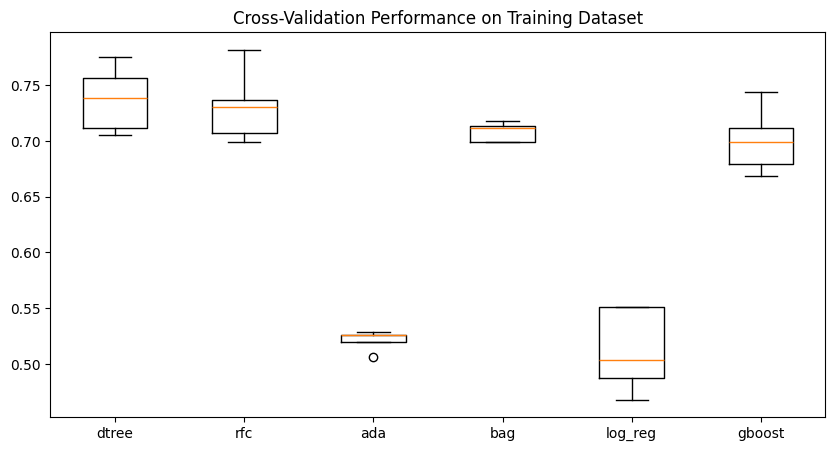

In [160]:
#Create a boxplot to visualize the cross-validated scores of the models
plt.figure(figsize=(10, 5)) # Set the figure size
plt.boxplot(results1) # Create a boxplot
plt.xticks(range(1, 7), names) # Set the xticks
plt.title("Cross-Validation Performance on Training Dataset") # Set the title
plt.show()

**Decision Tree, Random Forest, and Bagging Classifiers had the highest CV scores**

### Model Building with Oversampled data


* Instantiate SMOTE for oversampling
* Perform same model loop to find CV and recall scores

In [161]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train) # Fit and apply the SMOTE

In [162]:
#Check the distribution of the target variable before oversampling and after oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over == 0)))

#Check the shape of the training set before and after oversampling
X_train.shape, X_train_over.shape, y_train.shape, y_train_over.shape


Before OverSampling, counts of label '1': 781
Before OverSampling, counts of label '0': 13219 

After OverSampling, counts of label '1': 13219
After OverSampling, counts of label '0': 13219


((14000, 40), (26438, 40), (14000,), (26438,))

**Target now has equal, oversampled values**

In [163]:
#Build models using the oversampled data
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("rfc", RandomForestClassifier(random_state=1)))
models.append(("ada", AdaBoostClassifier(random_state=1)))
models.append(("bag", BaggingClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(("gboost", GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.971329541740435
rfc: 0.9832058879591166
ada: 0.8874346817414539
bag: 0.9770028213709836
log_reg: 0.8792647263373178
gboost: 0.9232918799580773

Validation Performance:

dtree: 0.78419452887538
rfc: 0.8389057750759878
ada: 0.8662613981762918
bag: 0.8115501519756839
log_reg: 0.8358662613981763
gboost: 0.8844984802431611


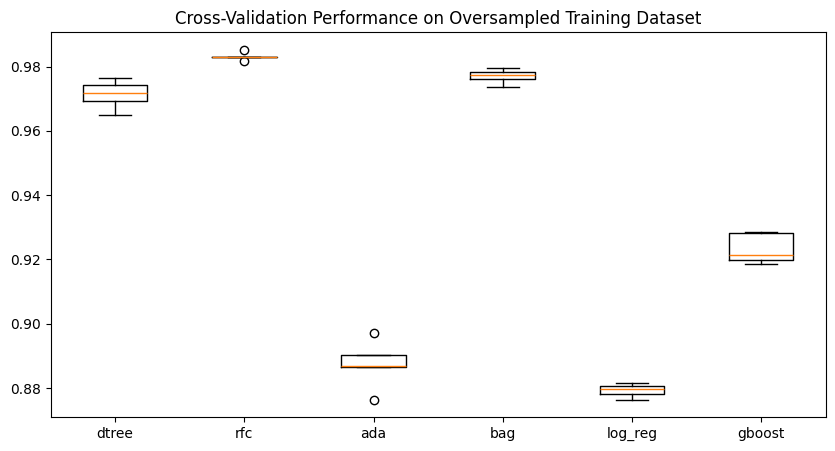

In [164]:
#Create a boxplot to visualize CV scores with Oversampling
plt.figure(figsize=(10, 5))
plt.boxplot(results1)
plt.xticks(range(1, 7), names)
plt.title("Cross-Validation Performance on Oversampled Training Dataset")
plt.show()

### Model Building with Undersampled data

* Instantiate RandomUnderSampler for undersampling
* Perform same model loop to find CV and recall scores

In [165]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [166]:
#check distribution of target variables before and after undersampling
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_un == 0)))

#check the shape of the training data before and after undersampling
X_train.shape, X_train_un.shape, y_train.shape, y_train_un.shape

Before Undersampling, counts of label '1': 781
Before Undersampling, counts of label '0': 13219 

After Undersampling, counts of label '1': 781
After Undersampling, counts of label '0': 781


((14000, 40), (1562, 40), (14000,), (1562,))

**Target now has equal, undersampled values**

In [167]:
#Build models using oversampled data

models = [] #create empty list to store models

models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("rfc", RandomForestClassifier(random_state=1)))
models.append(("ada", AdaBoostClassifier(random_state=1)))
models.append(("bag", BaggingClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(("gboost", GradientBoostingClassifier(random_state=1)))

results1 = [] #create empty list to store CV scores
names = [] #create empty list to store model names

#loop through all models to get a mean CV score
print("\n" "Cross-Validation performance on training dataset:" "\n")
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold)
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

#print validation performance
print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8488731014208721
rfc: 0.8872856442920136
ada: 0.8501224889759922
bag: 0.8565817409766454
log_reg: 0.8476400457292177
gboost: 0.8847133757961784

Validation Performance:

dtree: 0.8389057750759878
rfc: 0.8814589665653495
ada: 0.8571428571428571
bag: 0.8480243161094225
log_reg: 0.8358662613981763
gboost: 0.8905775075987842


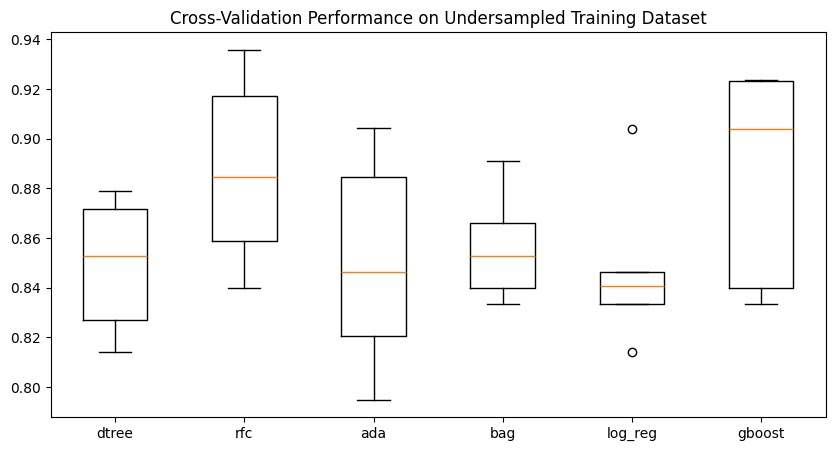

In [168]:
# Create boxplot to visualize CV scores after understampling
plt.figure(figsize=(10, 5))
plt.boxplot(results1)
plt.xticks(range(1, 7), names)
plt.title("Cross-Validation Performance on Undersampled Training Dataset")
plt.show()

### Compare the best models to tune

**The models that will be tuned**
*   RFC Undersample
*   Adaboost Oversample
*   GBoost Oversample
*   GBoost Oversample
*   Adaboost Undersample
*   Log Reg Undersample

## HyperparameterTuning

### Tuning Random Forest Classifier Undersample

In [169]:
#Define the Model
model = RandomForestClassifier(random_state=1)

#RandomsearchCV Parameters
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV on undersamped data
random_search.fit(X_train_un, y_train_un)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 200, 'min_samples_leaf': 3, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV Score: 0.8924220153519518


In [170]:
#Implement the best parameters
rf_tuned = RandomForestClassifier(n_estimators=250, min_samples_leaf=2, max_features='sqrt', max_samples=0.5, random_state=1)

#Fit the best parameters on the undersampled training data
rf_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=250,
                       random_state=1)

In [171]:
#Check the performance of the model on the undersampled training data
rf_tuned_train = model_performance_classification_sklearn(rf_tuned, X_train_un, y_train_un)
rf_tuned_train

,Accuracy,Recall,Precision,F1
0,0.964149,0.93598,0.991859,0.963109


In [172]:
#Check the performance of the model on the validation set
rf_tuned_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
rf_tuned_val

,Accuracy,Recall,Precision,F1
0,0.951833,0.884498,0.5369,0.668197


**Recall and Accuracy are good on the validation set but Precision and F1 are poor**

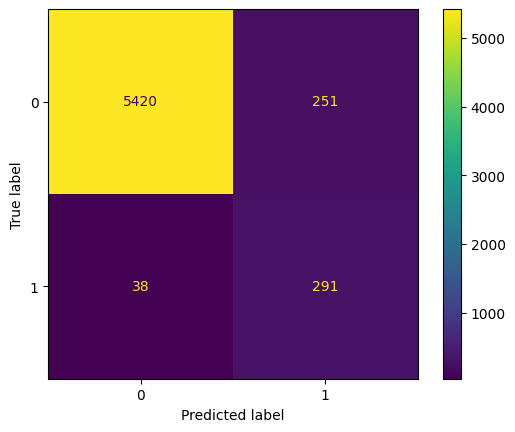

In [173]:
#Create confusion matrix for rf_tuned model
cm = confusion_matrix(y_val, rf_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()


### Tuning Adaboost Oversample

In [174]:
#Define the model
model = AdaBoostClassifier(random_state=1)

#RandomsearchCV Parameters
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=3, random_state=1)]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV
random_search.fit(X_train_over, y_train_over)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [0.2, 0.05],
                                        'n_estimators': [100, 150, 200]},
                   random_state=1,
                   scoring=make_scorer(recall_score, response_method='predict'))

In [175]:
print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV Score: 0.9130036925672987


In [176]:
#Implement the best parameters
ada_tuned = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=3, random_state=1), random_state=1)

#Fit the best parameters on the oversampled training data
ada_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [177]:
#Check the performance of the tuned Adaboost model on the oversampled training data
ada_tuned_train = model_performance_classification_sklearn(ada_tuned, X_train_over, y_train_over)
ada_tuned_train

,Accuracy,Recall,Precision,F1
0,0.938725,0.913836,0.961707,0.937161


In [178]:
#Check the performance of the tuned Adaboost model on the validation set
ada_tuned_val = model_performance_classification_sklearn(ada_tuned, X_val, y_val)
ada_tuned_val

,Accuracy,Recall,Precision,F1
0,0.95,0.87538,0.526508,0.657534


**Recall and Accuracy are good on the validation set but Precision and F1 are poor**

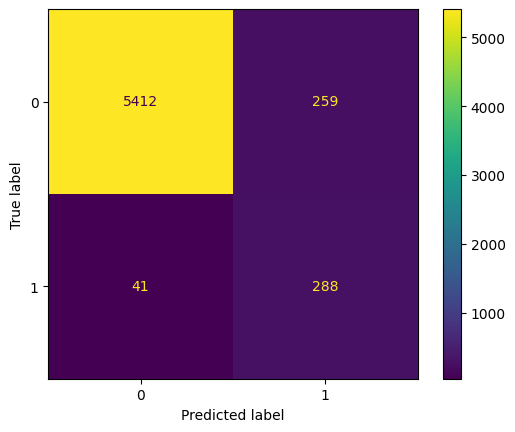

In [179]:
#Create confusion matrix for ada_tuned model
cm = confusion_matrix(y_val, ada_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()


### Tuning Gradient Boost Classifier Undersample

In [180]:
#Define the model
model = GradientBoostingClassifier(random_state=1)

#Parameters for RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV on Undersampled data
random_search.fit(X_train_un, y_train_un)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2} with CV Score: 0.8949861179160543


In [181]:
#Implement the best parameters
gboost_tuned = GradientBoostingClassifier(subsample=0.5, n_estimators=125, max_features=0.5, learning_rate=0.2, random_state=1)

#Fit the best parameters on the undersampled Validation data
gboost_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.5)

In [182]:
#Check the performance on the undersampled training data
gboost_tuned_train = model_performance_classification_sklearn(gboost_tuned, X_train_un, y_train_un)
gboost_tuned_train

,Accuracy,Recall,Precision,F1
0,0.994238,0.988476,1.0,0.994205


In [183]:
#Check the performance on the validation data
gboost_tuned_val = model_performance_classification_sklearn(gboost_tuned, X_val, y_val)
gboost_tuned_val

,Accuracy,Recall,Precision,F1
0,0.936333,0.893617,0.458658,0.606186


**Recall and Accuracy are good on the validation set but Precision and F1 are poor**

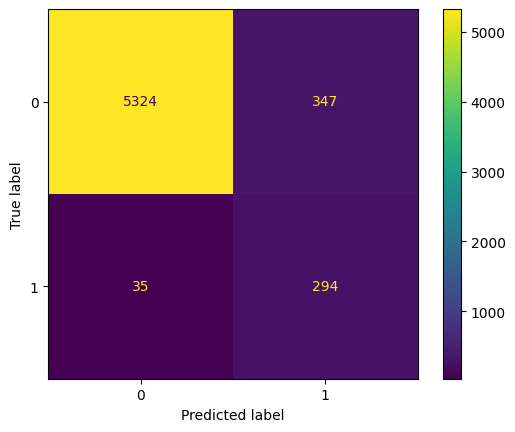

In [184]:
#Create confusion matrix for gboost_tuned model
cm = confusion_matrix(y_val, gboost_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()


### Tuning Gradient Boost Classifier Oversample

In [185]:
#Define the model
model = GradientBoostingClassifier(random_state=1)

#Parameters for RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV on Undersampled data
random_search.fit(X_train_over, y_train_over)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 1} with CV Score: 0.969891752999245


In [186]:
#Implement the best parameters
gboost_over_tuned = GradientBoostingClassifier(subsample=0.7, n_estimators=125, max_features=0.7, learning_rate=1, random_state=1)

#Fit the best parameters on the oversampled Validation data
gboost_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=125,
                           random_state=1, subsample=0.7)

In [ ]:
#Check the performance on the oversampled training data
gboost_over_tuned_train = model_performance_classification_sklearn(gboost_over_tuned, X_train_over, y_train_over)
gboost_over_tuned_train

In [188]:
#Check the performance on the validation data
gboost_over_tuned_val = model_performance_classification_sklearn(gboost_over_tuned, X_val, y_val)
gboost_over_tuned_val

,Accuracy,Recall,Precision,F1
0,0.9615,0.848024,0.606522,0.707224


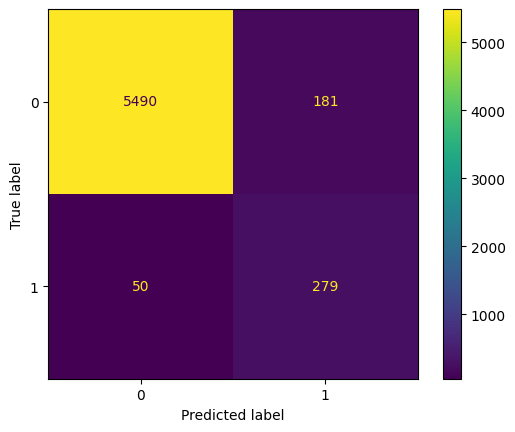

In [189]:
#Create confusion matrix for gboost_over_tuned model
cm = confusion_matrix(y_val, gboost_over_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()

* **This Model is overfitting the training data**
* **The Recall score is lower than the previous models**

### Tuning Adaboost Undersample

In [190]:
#Define the model
model = AdaBoostClassifier(random_state=1)

#RandomsearchCV Parameters
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1,
)

#Fit RandomSearchCV
random_search.fit(X_train_un, y_train_un)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV Score: 0.8719418585660623


In [ ]:
#Implement the best parameters
ada_tuned_under = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, estimator=DecisionTreeClassifier(max_depth=3, random_state=1), random_state=1)

#Fit the best parameters on the undersampled training data
ada_tuned_under.fit(X_train_un, y_train_un)

In [ ]:
#Check the performance on the training data
ada_tuned_under_train = model_performance_classification_sklearn(ada_tuned_under, X_train_un, y_train_un)
ada_tuned_under_train

In [ ]:
#Fit the tuned adaboost classifier on the validation data
ada_tuned_under_val = model_performance_classification_sklearn(ada_tuned_under, X_val, y_val)
ada_tuned_under_val

In [ ]:
#Create confusion matrix for the adaboost oversample tuned model
cm = confusion_matrix(y_val, ada_tuned_under.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()

**Recall and Accuracy are good on the validation set but Precision and F1 are poor**

### Tuning Logistic Regression Undersample

In [195]:
#Define the model
model = LogisticRegression(random_state=1)

#RandomsearchCV Parameters
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Instantiate RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1)

#Fit RS on Undersampled dataset
random_search.fit(X_train_un, y_train_un)

print("Best Parameters: {} with CV Score: {}".format(random_search.best_params_, random_search.best_score_))

Best Parameters: {'C': 0.1} with CV Score: 0.8488567695574065


In [196]:
#Establish LR model with best parameters
lr_tuned = LogisticRegression(C=0.1)

#Fit the best parameters on the undersampled training data
lr_tuned.fit(X_train_un, y_train_un)

LogisticRegression(C=0.1)

In [197]:
#Check performance on the training data
lr_tuned_train = model_performance_classification_sklearn(lr_tuned, X_train_un, y_train_un)
lr_tuned_train

,Accuracy,Recall,Precision,F1
0,0.857875,0.852753,0.861578,0.857143


In [198]:
#Check performance on the validation set
lr_tuned_val = model_performance_classification_sklearn(lr_tuned, X_val, y_val)
lr_tuned_val

,Accuracy,Recall,Precision,F1
0,0.879,0.835866,0.290391,0.431034


**Recall and Accuracy are good on the validation set but Precision and F1 are poor**

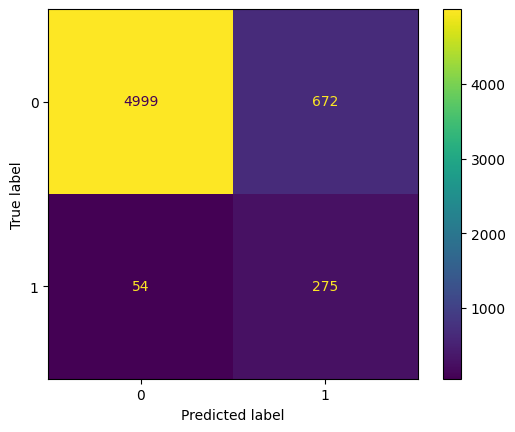

In [199]:
#Create confusion matrix
cm = confusion_matrix(y_val, lr_tuned.predict(X_val))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()

## Model performance comparison and choosing the final model

In [200]:
#Compare the scores from the tuned models on the training data
print("Training Performance:" "\n",
      "Tuned RF Undersample:" "\n", rf_tuned_train, "\n",
      "Tuned Adaboost Oversample:" "\n", ada_tuned_train, "\n",
      "Tuned GBoost Undersample" "\n", gboost_tuned_train, "\n",
      "Tuned GBoost Oversample" "\n", gboost_over_tuned_train, "\n",
      "Tuned AdaBoost Undersample:" "\n", ada_tuned_under_train, "\n",
      "Tuned Logistic Reg Undersample" "\n", lr_tuned_train)


Training Performance:
 Tuned RF Undersample:
    Accuracy   Recall  Precision        F1
0  0.964149  0.93598   0.991859  0.963109 
 Tuned Adaboost Oversample:
    Accuracy    Recall  Precision        F1
0  0.938725  0.913836   0.961707  0.937161 
 Tuned GBoost Undersample
    Accuracy    Recall  Precision        F1
0  0.994238  0.988476        1.0  0.994205 
 Tuned GBoost Oversample
    Accuracy    Recall  Precision        F1
0  0.981806  0.979121   0.984408  0.981757 
 Tuned AdaBoost Undersample:
    Accuracy    Recall  Precision        F1
0  0.951985  0.916773   0.986226  0.950232 
 Tuned Logistic Reg Undersample
    Accuracy    Recall  Precision        F1
0  0.857875  0.852753   0.861578  0.857143


In [201]:
#Compare the scores from the tuned models on the validation data
print("Validation Performance:" "\n",
      "Tuned RF Undersample:" "\n", rf_tuned_val, "\n",
      "Tuned Adaboost Oversample:" "\n", ada_tuned_val, "\n",
      "Tuned GBoost Undersample" "\n", gboost_tuned_val, "\n",
      "Tuned GBoost Oversample" "\n", gboost_over_tuned_val, "\n",
      "Tuned AdaBoost Undersample:" "\n", ada_tuned_under_val, "\n",
      "Tuned Logistic Reg Undersample" "\n", lr_tuned_val)

Validation Performance:
 Tuned RF Undersample:
    Accuracy    Recall  Precision        F1
0  0.951833  0.884498     0.5369  0.668197 
 Tuned Adaboost Oversample:
    Accuracy   Recall  Precision        F1
0      0.95  0.87538   0.526508  0.657534 
 Tuned GBoost Undersample
    Accuracy    Recall  Precision        F1
0  0.936333  0.893617   0.458658  0.606186 
 Tuned GBoost Oversample
    Accuracy    Recall  Precision        F1
0    0.9615  0.848024   0.606522  0.707224 
 Tuned AdaBoost Undersample:
    Accuracy    Recall  Precision        F1
0  0.944667  0.866261   0.497382  0.631929 
 Tuned Logistic Reg Undersample
    Accuracy    Recall  Precision        F1
0     0.879  0.835866   0.290391  0.431034


#### **Tuned Gradient Boost Oversample**

**The Tuned Gradient Boost Oversample had a high Recall score the was comparible to the training fit. This will be used on the test data**

### Test set final performance

In [202]:
#Fit the Tuned Gradient Boost Oversample model on the test data
gboost_over_tuned_test = model_performance_classification_sklearn(gboost_over_tuned, X_test, y_test)
gboost_over_tuned_test

,Accuracy,Recall,Precision,F1
0,0.956,0.833333,0.57598,0.681159


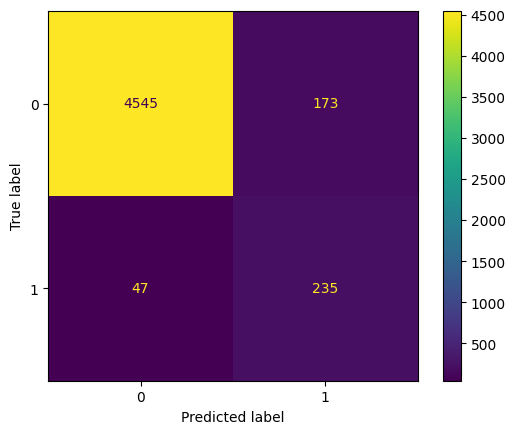

In [203]:
#Create a confusion matrix for the results
cm = confusion_matrix(y_test, gboost_over_tuned.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()

**The Recall Score was 83%. There were 47 false negatives**

### Feature Importances

In [204]:
#Sort importance features
feature_importances_values = gboost_over_tuned.feature_importances_
sorted_indices = np.argsort(feature_importances_values)
feature_importances = X_train.columns[sorted_indices]
sorted_feature_importances = feature_importances_values[sorted_indices]

feature_importances

Index(['V20', 'V17', 'V31', 'V32', 'V19', 'V24', 'V7', 'V16', 'V5', 'V25',
       'V8', 'V4', 'V33', 'V27', 'V22', 'V13', 'V6', 'V1', 'V29', 'V28', 'V34',
       'V2', 'V10', 'V12', 'V35', 'V26', 'V38', 'V11', 'V30', 'V37', 'V21',
       'V23', 'V40', 'V15', 'V36', 'V9', 'V3', 'V14', 'V39', 'V18'],
      dtype='object')

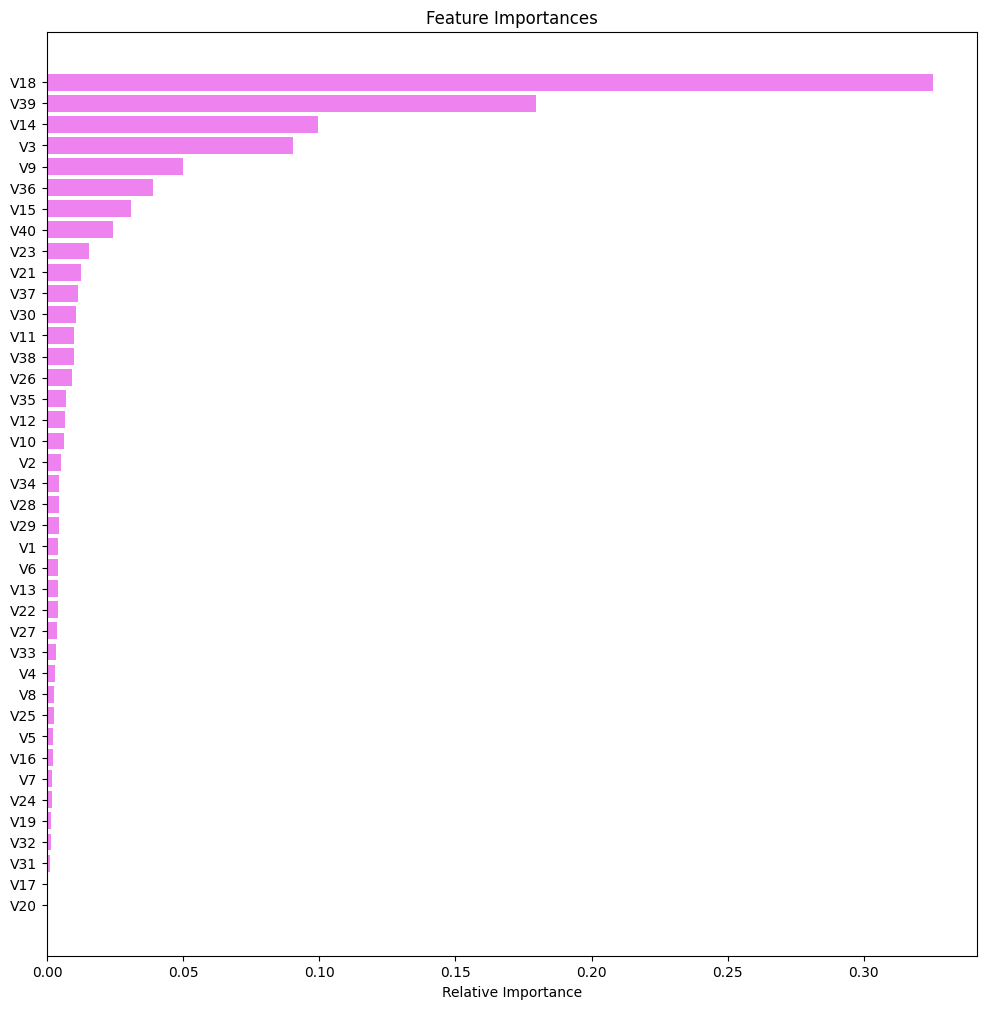

In [205]:
#Plot the importance features
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(feature_importances)), sorted_feature_importances, color="violet", align="center")
plt.yticks(range(len(feature_importances)), [X_train.columns[i] for i in sorted_indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines to build the final model


In [206]:
#Create a pipeline for the gradient boost oversampled model
GBO_Pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('gbo', gboost_over_tuned)])

In [207]:
#Add pipeline element: separate independent and dependent variables in train dataset
X_Pipeline = train_set.drop(columns=['Target'])
y_Pipeline = train_set['Target']

X_Pipeline.shape, y_Pipeline.shape

((20000, 40), (20000,))

In [208]:
#Add pipeline element: separate independent and dependent variables in train dataset
X_Pipeline_test = test_set.drop(columns=['Target'])
y_Pipeline_test = test_set['Target']

X_Pipeline_test.shape, y_Pipeline_test.shape

((5000, 40), (5000,))

In [209]:
#Treat missing values with imputer
imputer = SimpleImputer(strategy='median')
X_Pipeline = imputer.fit_transform(X_Pipeline)

In [210]:
#Instantiate Smote
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over, y_over = sm.fit_resample(X_Pipeline, y_Pipeline)

In [211]:
#Fit Pipeline on the training data
GBO_Pipeline.fit(X_over, y_over)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('gbo',
                 GradientBoostingClassifier(learning_rate=1, max_features=0.7,
                                            n_estimators=125, random_state=1,
                                            subsample=0.7))])

In [ ]:
#Fit pipeline on test dataset
GBO_Pipeline = model_performance_classification_sklearn(GBO_Pipeline, X_Pipeline_test, y_Pipeline_test)
GBO_Pipeline

## Cost Calculator for Conclusions

In [213]:
# Define the costs per unit for each action
Replacement = 1000  # Cost of replacement
Repair = 500  # Cost of repair
Inspection = 150   # Cost of inspection

# Define the number of each type of outcome
TP = 213  # True Positives: Failures correctly identified (need repair)
FN = 37   # False Negatives: Failures not identified (need replacement)
FP = 101  # False Positives: Non-failures incorrectly identified (need inspection)

# Calculate total costs with the model
total_cost_with_model = (TP * Repair) + (FN * Replacement) + (FP * Inspection)

# Calculate total cost without the model (all failures require replacement)
total_cost_without_model = 250 * Replacement  # 250 is the total number of failures

# Print the results
print("Cost with model:", total_cost_with_model)
print("Cost without model:", total_cost_without_model)
print("Total savings:", total_cost_without_model - total_cost_with_model)

Cost with model: 158650
Cost without model: 250000
Total savings: 91350
Cost with model: 158650
Cost without model: 250000
Total savings: 91350


# Business Insights and Conclusions

**Insights**
* Using Recall as our main performance measure, the final model had a recall score of 85%.
* 15% of the time, the model will not detect a failure and will lead to a needed replacement, the highest cost for Renewind.
* The three most important features for identification are: V36, V16, V18
* The precision score is 68%, indicating that the model will falsely predict a failure in a healthy generator 32% of the time.


**Conclusions**

* The model is efficient with recall and could prove effective in saving money but the costs associate with repairs, replacement, and inspection require analysis.
* A calculator is provided above based on the chosen model. If replacement costs 1000, repair costs 500, and inspection costs 150, the company will save 91,350 dollars.
* The company needs to define a threshold for savings in order to determine if this model is suitable for production

***